<a href="https://colab.research.google.com/github/rajeshmore1/IIM-Indore-Case-study-Logistic-Regression/blob/main/Case_Sudy_IIM_Indore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions
Assume that you are working as a sales and marketing manager for a high-end professional laptop series, responsible for its sales and marketing initiatives for a given region. You are tasked to reach out to potential buyer segment of customers, under the assumption that high income customers are more likely to purchase a high end laptop as compared to low income customer segment. 

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. The following table summarizes some of these attributes:

 

Variable

Description

Age

Age of the person

Workclass

Class of work

Fnlwgt

Final weight of how much of the population it represents

Education

Education level

education_num

Numeric education level

marital_status

Marital status  of the person

Occupation

Occupation  of the person

Relationship

Type of relationship

Race

Race of the person

Sex

Sex of the person

capital_gain

Capital gains obtained

capital_loss

Capital loss

hours_per_week

Average number of hour working per week

native_country

Country of origin

Salary

Income level

 

The objective here is to explore the possibility in predicting the income levels based on the individual’s personal information. Current income classification in the data is >50k (y=1) and <=50k (y=0) as two categories of person’s income level. You plan to use this data to create a model that helps explain the income level. Please answer below questions based on the model you build. Also assume that the ‘?’ in the data need not be treated as missing values (keep ‘?’ in the data as is)

 

Note: Do not split the data, as typically done for model validation.


In [10]:
# Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/INeuron Assignments/adult-1-1.csv')

# Print the first 5 rows of the dataframe.
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.shape

(48842, 15)

In [ ]:
"""Suppose we wish to fit a model with 8 predictor variables
 in total: i.e., all six continuous predictors - age, fnlwgt, education_num, 
 capital_gain, capital_loss, hours_per_week,
  and two categorical variables - gender and occupation."""

  

In [6]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [7]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [8]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

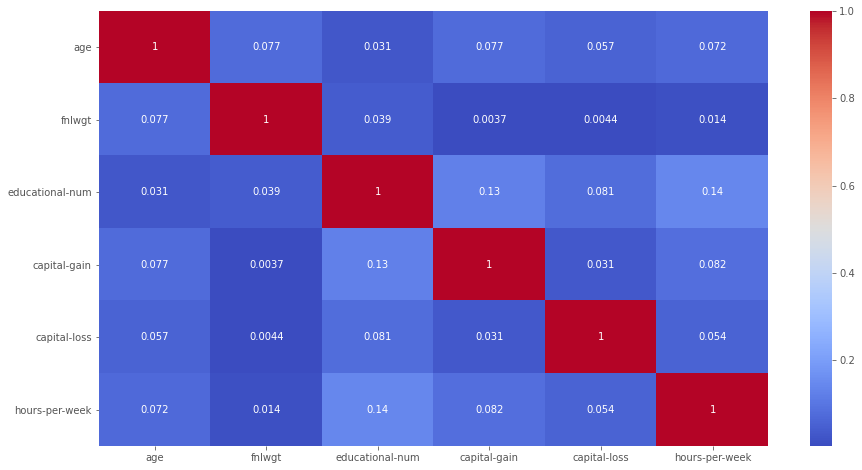

In [11]:

 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [19]:
newdf= df[['age','fnlwgt','educational-num','capital-gain', 'capital-loss', 'hours-per-week','gender','occupation','income']]
newdf.head(3)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender,occupation,income
0,25,226802,7,0,0,40,Male,Machine-op-inspct,<=50K
1,38,89814,9,0,0,50,Male,Farming-fishing,<=50K
2,28,336951,12,0,0,40,Male,Protective-serv,>50K


In [20]:
a = pd.get_dummies(newdf,drop_first=True)

In [21]:
a.head(3)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender_Male,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,income_>50K
0,25,226802,7,0,0,40,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,38,89814,9,0,0,50,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,28,336951,12,0,0,40,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


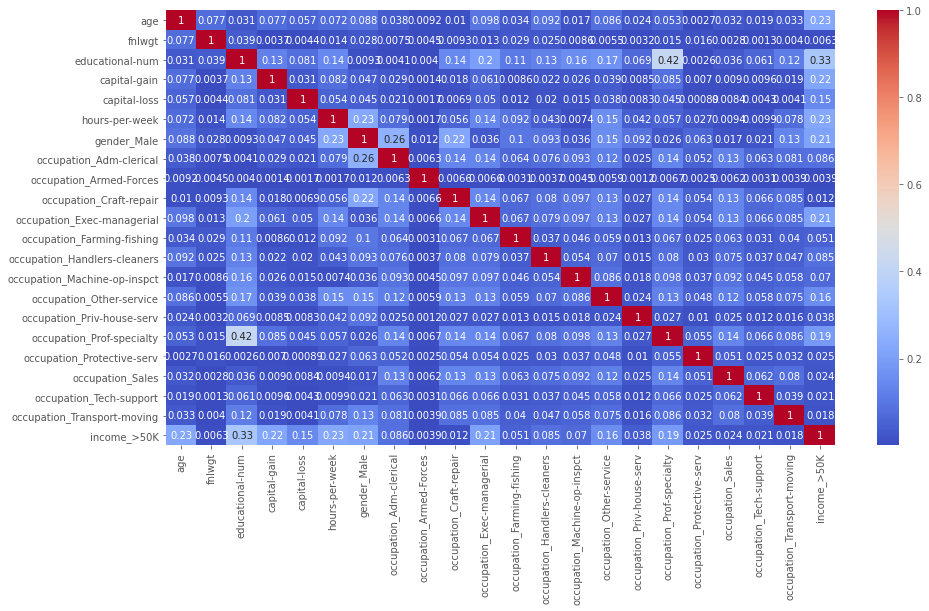

In [22]:
plt.figure(figsize=(15,8))
correlation = a.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [23]:
X = a.iloc[:,:-1]
y = a['income_>50K']

In [24]:
X.head(1)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender_Male,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,7,0,0,40,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
X.shape

(48842, 21)

In [25]:
y.head(1)

0    0
Name: income_>50K, dtype: uint8

In [27]:
y.shape

(48842,)

In [28]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
clf.coef_

array([[-7.48797451e-03, -3.67863616e-06, -1.72801327e-03,
         3.41357416e-04,  7.71208742e-04, -8.07385064e-03,
         1.33784031e-05, -1.02581217e-04,  1.64909201e-07,
        -4.72163608e-05,  1.12939315e-04, -3.76285799e-05,
        -5.18674513e-05, -5.81411122e-05, -1.47201698e-04,
        -7.79885504e-06,  9.23049385e-05,  5.18272873e-06,
        -2.17149858e-05, -6.43295900e-07, -2.40795439e-05]])

In [30]:
clf.intercept_

array([-0.00035741])

In [32]:
y_pred = clf.predict(X)
y_pred


array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [33]:
from sklearn import metrics
accur=metrics.accuracy_score(y_pred, y)
print(accur)

0.7978993489210106
